# Random Strings Simulation

In [1]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
from len import bool_conv, inv_bool_conv, BinaryH, finite_len_ab, H
%matplotlib widget
finiteapprox = finite_len_ab()
# Defining the constants
n0_ =  220//2
s_min = 0.394
r_min = 0.401 #79
qhat_pick_ = 0.350 # 0.33568
ALPHA = 0.5
p_ = 0.00

# Other things
q_ = bool_conv(p_, bool_conv(qhat_pick_,p_))
n = int(n0_/(1-ALPHA))
kp=  (1- BinaryH(q_))
print(f' kp is {kp};')
k = np.ceil(n*(1- finiteapprox.BinaryH(q_, n)))
print(f'k is {k}')
num_str = int(2**k) #* 16 
print(f'the number of strings are {num_str}')
choice_p = 0.5 # the probability of generating a 1 from the source if it is generated from the binomial


Initialised the finite length class
 kp is 0.06593194462450902;
k is 19.0
the number of strings are 524288


In [2]:
# Generating the random fixed points strings
fp_strings = np.random.choice(a = [False, True], size = (num_str, n), p = (1- choice_p, choice_p)) 
print(f' The shape of the string matrix {fp_strings.shape}')
print(f' The memory occupied of the string matrix {fp_strings.nbytes} bytes')
target_string = np.random.choice( a = [ False, True], size = (n-n0_,), p = [1 -choice_p, choice_p] )




STEP = int(ALPHA*n)
cmp_left_right = np.logical_xor(fp_strings[:, :int(ALPHA*n)], fp_strings[:, int(ALPHA*n): int(ALPHA*2*n)])
assert cmp_left_right.shape[0] == num_str
print(f'cmp left right shape {cmp_left_right.shape}')
s_arr = np.sum( cmp_left_right, axis = 1) /(ALPHA*n)
print(f's_arr shape {s_arr.shape}')

target_dist_1 = np.sum( np.logical_xor(target_string, fp_strings[:,:STEP]), axis= 1)
target_dist_2 = np.sum( np.logical_xor(target_string, fp_strings[:,STEP:2*STEP]), axis= 1)
print(target_dist_1.shape)
print(target_dist_2.shape)

# concatenated = np.random.choice( a = [ False, True], size = (n0_,), p = [1 -choice_p, choice_p] )
target_string = np.hstack((target_string, target_string))

rhat_arr = np.where( target_dist_1 >target_dist_2, target_dist_1, target_dist_2)/(STEP)
print(rhat_arr.shape)
# del target_dist_1, target_dist_2, cmp_left_right
print(f'Target String Shape {target_string.shape}')

 The shape of the string matrix (524288, 220)
 The memory occupied of the string matrix 115343360 bytes
cmp left right shape (524288, 110)
s_arr shape (524288,)
(524288,)
(524288,)
(524288,)
Target String Shape (220,)


In [3]:
def root(rh, s, k, n):
    probs = np.array([1 - rh - s/2, s/2, s/2 , rh -s/2])
    # print('ps:',probs)
    return (k/n) + finiteapprox.H_n(probs,n, 4) - 2
    # return (k/n) + H(probs) - 2
print( 'The extra thing: ',  ( (1/2-4/2)*np.log2(2*np.pi*ALPHA*n) +1/(ALPHA*n) )/n )

The extra thing:  -0.06427360388820254


In [4]:
s_plt = list()
r_plt = list()

smax = 1 - (1-2*qhat_pick_)/ALPHA
s_check = np.linspace(np.min(s_arr), smax , 100)
print(f' args ( k, n0_) {( k, n0_)}')
for ss in (s_check):
    #args = (ss, k, ALPHA, n)
    args = (ss, k, n0_)
    #print(f'Sol args: {args}')
    fun = lambda x:root(x, *args)
    try:
        sol =root_scalar(fun, bracket= (ss/2, 0.5))
        if sol.converged:
            s_plt.append(ss)
            r_plt.append(sol.root)
    except ValueError:
        continue
#arg_inds = np.argsort(s_plt)
s_plt = np.array(s_plt)#[arg_inds]
r_plt = np.array(r_plt)#[arg_inds]


 args ( k, n0_) (np.float64(19.0), 110)


In [5]:
# #
# # tolerance: Just doing a basic 1D grid search if the root(rh) -0 = tol 
# # we say rh is solution
# r = np.linspace(rhat_arr.min(), rhat_arr.max(), 100)
# tol = 0.0001 
# smax = 1 - (1-2*qhat_pick_)/ALPHA
# r_check = np.linspace(0, 0.5, 100)
# s_check = np.linspace(np.min(s_arr), smax , 100)
# r_plt = list()
# s_plt = list()

# for ss in (s_check):
#    args = (ss, k, n0_)
#    rcheck  = list()
#    for rr in r_check:
#        root_check = root(rr, *args)
#        cond = np.abs(root_check - 0) <tol
#        if cond:
#            #s_plt.append(ss)
#            rcheck.append((rr, root_check))
#            #print(f'Broken, {ss} {rr}')
#    if len(rcheck) == 0:
#        continue
#    else:
#        s_plt.append(ss)
#        rmin = sorted(rcheck, key = lambda x: np.abs(x[1]) )[0]
#        r_plt.append(rmin[0])


# #assert len(s_plt) <=3
# print(f' lens = {len(s_plt)}' )
# s_plt = np.array(s_plt)
# r_plt = np.array(r_plt) 
# #


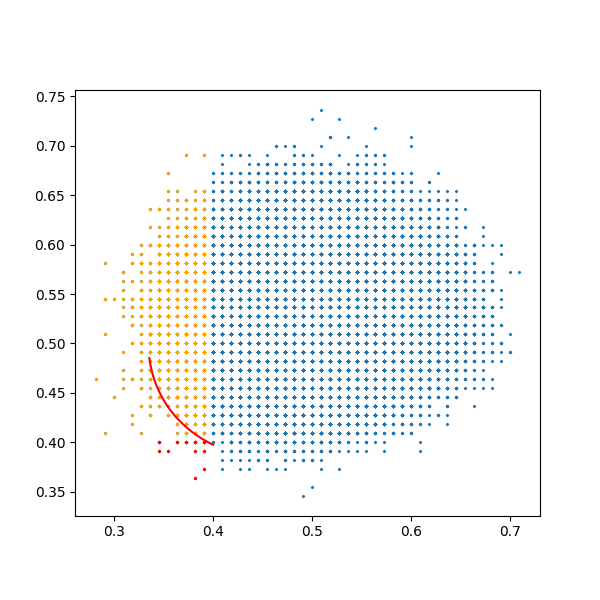

In [5]:
# Plot 
inds_other = s_arr/4 + 0.25 <=qhat_pick_
ind = s_arr <= s_min
size = 2
ind2 = np.logical_and(ind, rhat_arr<=r_min)

plt.figure(figsize=(6,6))
plt.scatter( s_arr, rhat_arr, s = size, marker='x')
plt.scatter( s_arr[ind], rhat_arr[ind], s = size, marker='x',color = 'orange')
# plt.scatter( s_arr[inds_other], rhat_arr[inds_other], s = size, marker='x',color = 'violet')
plt.scatter( s_arr[ind2], rhat_arr[ind2], s = size, color = 'red', marker='x')
plt.plot(s_plt, r_plt, color = 'red')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [6]:
assert s_arr.shape == rhat_arr.shape
worst_s_arr = np.max(s_arr[ind])
get_worst_s_ind = s_arr == worst_s_arr
get_best_r_in = rhat_arr == np.min(rhat_arr[s_arr == worst_s_arr])
get_index = np.logical_and(get_worst_s_ind, get_best_r_in)
np.sum(get_index)


np.int64(1)

In [57]:
CONSTR_TARG = target_string
GIVENSTR = np.squeeze(fp_strings[get_index, :])
# print(GIVENSTR.shape)
assert GIVENSTR.ndim ==1
print("Assumed that alpha is half, so change the code\
      carefully if it's not the case")


L = 1000
dists_from_other = np.zeros(L)
dists_from_given = np.zeros(L)
dists_from_target = np.zeros(L)
left_substr = GIVENSTR[:n//4]
right_substr = GIVENSTR[3*n//4:n]
assert left_substr.shape == right_substr.shape

for l in range(L):
    random_part = np.random.choice(
        a = [True, False],
        size = (n0_,),
        p = [choice_p, 1- choice_p]
        )
    CONSTR_STR = np.hstack((left_substr, right_substr, random_part) )
    minm = np.inf
    for i, a_str in enumerate(fp_strings):
        assert a_str.shape == CONSTR_STR.shape
        dist = np.sum(np.logical_xor(CONSTR_STR, a_str))
        minm = min(dist, minm)

    dist = np.sum(np.logical_xor(GIVENSTR, CONSTR_STR)) 
    dists_from_given[l] = dist/n
    dists_from_other[l] = minm/n
    dists_from_target[l] = np.sum(np.logical_xor(CONSTR_TARG, CONSTR_STR)) 


Assumed that alpha is half, so change the code      carefully if it's not the case


Successful Replication 824
Death 176


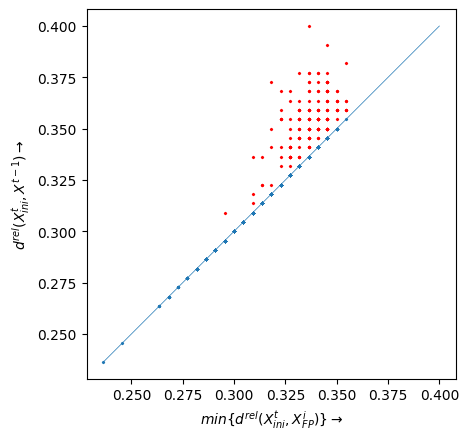

In [74]:
indices = np.logical_not(dists_from_given ==dists_from_other)
n_indices = np.logical_not(indices)
print(f'Successful Replication {np.sum(n_indices)}')
print(f'Death {np.sum(indices)}')
plt.cla()
plt.gca().set_aspect('equal')
x = np.linspace(np.min(dists_from_given), dists_from_given.max(), 100)
plt.scatter( dists_from_other[indices], dists_from_given[indices], s= 2, marker='x', color = 'red')
plt.scatter( dists_from_other[n_indices], dists_from_given[n_indices], s= 2, marker='x')

plt.ylabel(r'$d^{rel}(X^t_{ini},X^{t-1})\to$') 
plt.xlabel(r'$min\{d^{rel}(X^t_{ini},X^i_{FP})\}\to$') 

plt.plot(x,x, linewidth =0.5)
plt.savefig('death_repl.png', dpi = 300, bbox_inches ='tight')
plt.show()

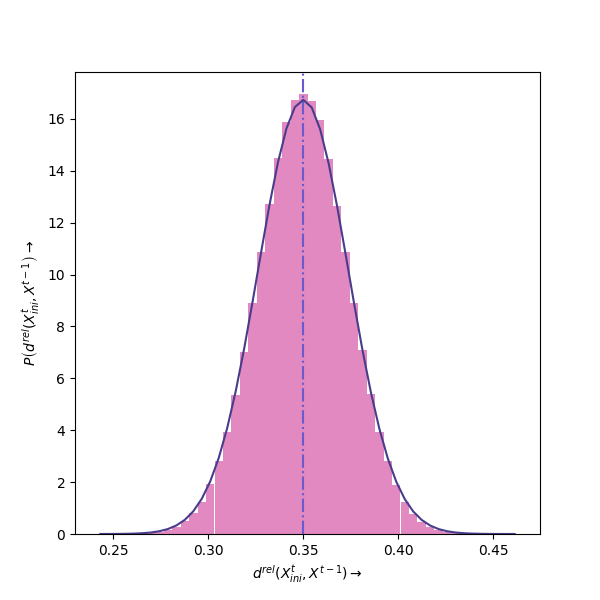

In [34]:
plt.clf()
_, x, _ =plt.hist(dists_from_given, bins  = 50, density=True, alpha = 0.5, color = 'mediumvioletred')
x = (x[1:]-x[:-1])/2 + x[:-1]
mean = worst_s_arr*ALPHA/2 + (1-ALPHA)/2
var = (1-ALPHA)/(4*n)
# normal_dist = lambda x : (1/np.sqrt(2*np.pi*var)) * np.exp( -(x-mean)**2/(2*var))
# plt.plot(np.normal(loc = mean, scale = var**0.5, size = 100) )
normal_pdf = (1/(np.sqrt(2*np.pi*var))) * np.exp(-0.5*((x-mean)**2)/var)
plt.axvline(x = mean, color = 'slateblue', linestyle = 'dashdot')
plt.plot(x, normal_pdf, color= 'darkslateblue', label = 'fit')
plt.xlabel(r'$d^{rel}(X^t_{ini},X^{t-1})\to$') 
plt.ylabel(r'$P\left(d^{rel}(X^t_{ini},X^{t-1}\right)\to$') 
plt.savefig('drel_ini_final.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
CONSTR_TARG = target_string

# print(CONSTR_TARG.shape)
assert CONSTR_TARG.shape == (n,)
GIVENSTR = np.squeeze(fp_strings[get_index, :])
# print(GIVENSTR.shape)
assert GIVENSTR.ndim ==1
print("Assumed that alpha is half, so change the code\
      carefully if it's not the case")


dists_from_other = np.zeros_like(s_arr)
dists_from_target = np.zeros_like(s_arr)


left_substr = GIVENSTR[:n//4]
right_substr = GIVENSTR[3*n//4:n]
assert left_substr.shape == right_substr.shape

random_part = np.random.choice(
    a = [True, False],
    size = (n0_,),
    p = [choice_p, 1- choice_p]
    )
CONSTR_STR = np.hstack((left_substr, right_substr, random_part) )

for i, a_str in enumerate(fp_strings[ind]):
    assert a_str.shape == CONSTR_STR.shape
    dist = np.sum(np.logical_xor(CONSTR_STR, a_str))
    dists_from_other[i] = dist/n
    dist = np.sum(np.logical_xor(CONSTR_TARG, a_str))
    dists_from_target[i] = dist/n

dist = np.sum(np.logical_xor(GIVENSTR, CONSTR_STR)) 
dist_from_given = dist/n

Assumed that alpha is half, so change the code      carefully if it's not the case


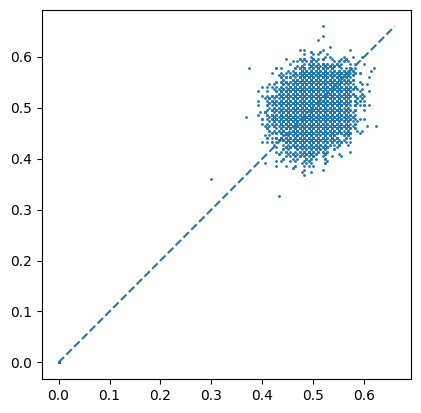

In [30]:
plt.gca().set_aspect('equal')
x = np.linspace(np.min(dists_from_target), dists_from_target.max(), 100)
plt.plot(x, x, linestyle='dashed')

plt.scatter( dists_from_other, dists_from_target, s = 1)

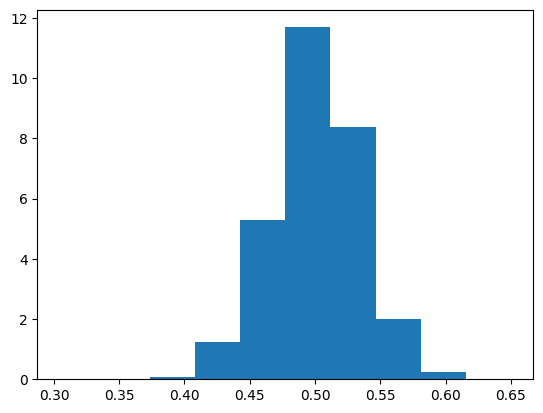

In [15]:
%matplotlib inline
plt.clf()
vals, bins, _ = plt.hist(dists_from_other, density=True)
# plt.axvline( x = dist_from_given)
plt.show()

In [16]:
print(vals)
print(bins)


[1.10425447e-04 2.53978528e-03 7.53653677e-02 1.24068511e+00
 5.28573488e+00 1.16898035e+01 8.37891729e+00 2.01509877e+00
 2.51880445e-01 7.23286679e-03]
[0.30454545 0.33909091 0.37363636 0.40818182 0.44272727 0.47727273
 0.51181818 0.54636364 0.58090909 0.61545455 0.65      ]


In [47]:
# Construct L strings by taking the left A substring and right A' substring
# Now pick  a random fp at random, sotre the distance to it and compare the distance of it with other string
CONSTR_TARG = target_string
assert CONSTR_TARG.shape == (n,)

L = 100000

dists_from_randomstr = np.zeros(L)
dists_from_target = np.zeros(L)
dists_from_given = np.zeros(L)

left_substr = GIVENSTR[:n//4]
right_substr = GIVENSTR[3*n//4:n]
assert left_substr.shape == right_substr.shape

for l in range(L):
    random_part = np.random.choice(
        a = [True, False],
        size = (n0_,),
        p = [choice_p, 1- choice_p]
        )
    random_str = np.random.choice(
        a = [True, False],
        size = (n,),
        p = [choice_p, 1- choice_p]
        )
    CONSTR_STR = np.hstack((left_substr, right_substr, random_part) )
    #COMPUTE THE DISTANCE OF THE CONSTRUCTED STRING TO THE Random STRING
    dist = np.sum(np.logical_xor( CONSTR_STR, random_str))
    dists_from_randomstr[l]= dist/n
    # COMPUTE THE DISTANCE OF THE CONSTRUCTED STRING TO THE TARGET STRING
    dists_from_target[l] = np.sum(np.logical_xor( CONSTR_STR, CONSTR_TARG))/n
    dists_from_given[l] = np.sum(np.logical_xor( CONSTR_STR, GIVENSTR))/n


In [46]:
dists_from_given.shape
# dists_from_randomstr.shape

(1000000,)

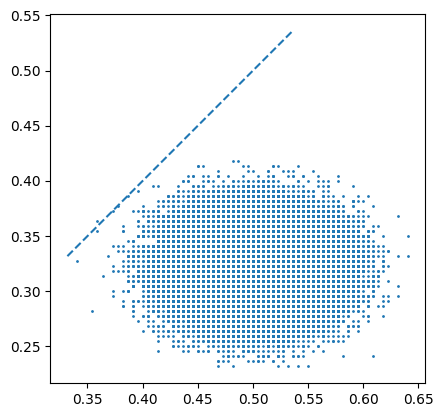

In [48]:
repl_ind = dists_from_randomstr<=dists_from_target
plt.clf()
plt.gca().set_aspect('equal')
plt.scatter(dists_from_randomstr, dists_from_given, s = 1)
x = np.linspace(np.min(dists_from_target), dists_from_target.max(), 100)
plt.plot(x, x, linestyle='dashed')


In [ ]:
#